In [31]:
# import des librairies dont nous aurons besoin
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from matplotlib.cbook import boxplot_stats
from scipy import stats
from scipy.stats import shapiro 
from scipy.stats import kstest
import statsmodels.api as sm
from statsmodels.formula.api import ols



from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [41]:
# chargement et affichage des données
data = pd.read_csv('../data.csv')
print(data.head())
data['region'].unique()

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [33]:
X = data[['age']]
y = data['charges']

In [34]:
model = LinearRegression()

In [35]:
model.fit(X, y)


LinearRegression()

In [36]:
model.score(X, y)


0.08940589967885804

In [37]:
predection = model.predict(X)

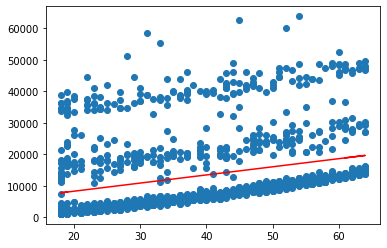

In [38]:
plt.scatter(X,y)
plt.plot(X,predection, c='r')

In [39]:
X = data.drop('charges', axis=1)
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.8, random_state=42)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder

# Prepare data
X = data[['sex', 'bmi', 'children', 'smoker', 'region']]
Y = data['charges']

# Encode categorical variables
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X)

# Fit model
model = LinearRegression()
model.fit(X_encoded, Y)
# Get score
score = model.score(X_encoded, Y)
print(score)

0.8112635567647891


In [53]:
X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names())
print(X_encoded_df['x1_15.96'].unique())

[0. 1.]


/home/apprenant/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
